## Julia on Colaboratory ##

[Colaboratory](https://colab.research.google.com) does not provide native support for the [Julia programming language](https://julialang.org). However, since Colaboratory gives you root access to the machine that runs your notebook (the *“runtime”* in Colaboratory terminology), we can install Julia support by uploading a specially crafted Julia notebook  – *this* notebook. We then install Julia and [IJulia](https://github.com/JuliaLang/IJulia.jl) ([Jupyter](https://jupyter.org)/Colaboratory notebook support) and reload the notebook so that Colaboratory detects and initiates what we installed.

In brief:

1. **Run the cell below**
2. **Reload the page**
3. **Edit the notebook name and start hacking Julia code below**

**If your runtime resets**, either manually or if left idle for some time, **repeat steps 1 and 2**.

### Acknowledgements ###

This hack by Pontus Stenetorp is an adaptation of [James Bradbury’s original Colaboratory Julia hack](https://discourse.julialang.org/t/julia-on-google-colab-free-gpu-accelerated-shareable-notebooks/15319/27), that broke some time in September 2019 as Colaboratory increased their level of notebook runtime isolation. There also appears to be CUDA compilation support installed by default for each notebook runtime type in October 2019, which shaves off a good 15 minutes or so from the original hack’s installation time.

In [0]:
# Installation cell
%%shell
if ! command -v julia 2>&1 > /dev/null
then
    wget 'https://julialang-s3.julialang.org/bin/linux/x64/1.3/julia-1.3.1-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add Plots; add PyPlot; add IJulia; add Knet; precompile"'
julia -e 'using Pkg; pkg"build Knet;"'

--2020-02-26 17:34:22--  https://julialang-s3.julialang.org/bin/linux/x64/1.3/julia-1.3.1-linux-x86_64.tar.gz
Resolving julialang-s3.julialang.org (julialang-s3.julialang.org)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to julialang-s3.julialang.org (julialang-s3.julialang.org)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 302 gce internal redirect trigger
Location: https://storage.googleapis.com/julialang2/bin/linux/x64/1.3/julia-1.3.1-linux-x86_64.tar.gz [following]
--2020-02-26 17:34:22--  https://storage.googleapis.com/julialang2/bin/linux/x64/1.3/julia-1.3.1-linux-x86_64.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.28.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.28.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95929584 (91M) [application/x-gzip]
Saving to: ‘/tmp/julia.tar.gz’

/tmp/julia.tar.gz   100%[===================>]  

In [0]:
using Knet
# Test if Knet is using gpu
Knet.gpu()

┌ Info: Precompiling Knet [1902f260-5fb4-5aff-8c31-6271790ab950]
└ @ Base loading.jl:1273
┌ Warning: You are using CUDNN 7.6.5 for CUDA 10.1.0 with CUDA toolkit 10.0.145; these might be incompatible.
└ @ CuArrays /root/.julia/packages/CuArrays/1njKF/src/CuArrays.jl:122


0

In [0]:
a = KnetArray(randn(4,4))
sigm.(a)

4×4 KnetArray{Float64,2}:
 0.881196  0.770551  0.756286  0.674216
 0.480851  0.82856   0.563325  0.146472
 0.593402  0.258245  0.470386  0.364558
 0.280699  0.479853  0.116356  0.263894

In [0]:
using Pkg
Pkg.test("Knet")

   Testing Knet
 Resolving package versions...
    Status `/tmp/jl_Kg9Sin/Manifest.toml`
  [621f4979] AbstractFFTs v0.5.0
  [79e6a3ab] Adapt v1.0.1
  [6710c13c] AutoGrad v1.2.1
  [b99e7846] BinaryProvider v0.5.8
  [fa961155] CEnum v0.2.0
  [3895d2a7] CUDAapi v2.1.0
  [c5f51814] CUDAdrv v5.1.0
  [be33ccc6] CUDAnative v2.9.1
  [944b1d66] CodecZlib v0.6.0
  [3a865a2d] CuArrays v1.7.0
  [864edb3b] DataStructures v0.17.9
  [5789e2e9] FileIO v1.2.2
  [0c68f7d7] GPUArrays v2.0.1
  [033835bb] JLD2 v0.1.11
  [1902f260] Knet v1.3.3
  [929cbde3] LLVM v1.3.3
  [1914dd2f] MacroTools v0.5.4
  [872c559c] NNlib v0.6.4
  [efe28fd5] OpenSpecFun_jll v0.5.3+1
  [bac558e1] OrderedCollections v1.1.0
  [ae029012] Requires v1.0.1
  [276daf66] SpecialFunctions v0.10.0
  [a759f4b9] TimerOutputs v0.5.3
  [3bb67fe8] TranscodingStreams v0.9.5
  [2a0f44e3] Base64  [`@stdlib/Base64`]
  [ade2ca70] Dates  [`@stdlib/Dates`]
  [8ba89e20] Distributed  [`@stdlib/Distributed`]
  [b77e0a4c] InteractiveUtils  [`@stdlib/Inter

┌ Warning: You are using CUDNN 7.6.5 for CUDA 10.1.0 with CUDA toolkit 10.0.145; these might be incompatible.
└ @ CuArrays ~/.julia/packages/CuArrays/1njKF/src/CuArrays.jl:122


  0.557262 seconds (408.42 k allocations: 21.173 MiB, 55.37% gc time)
Knet.gpuCount() = 1
Knet.gpu() = 0
Knet.tk = ["/usr/local/cuda-10.0", "/usr/local/cuda-10.0/targets/x86_64-linux", "/usr/local/cuda-10.1"]
Knet.libknet8 = "/root/.julia/packages/Knet/2xiR8/deps/libknet8"
Knet.cudartfound = true
Knet.cudaRuntimeVersion = 10000
Knet.cudaDriverVersion = 10010
Knet.cudaGetDeviceCount() = 1
Knet.cudaGetDevice() = 0
Knet.cudaMemGetInfo() = (15578562560, 15812263936)
Knet.cudaDeviceSynchronize() = nothing
Knet.nvmlfound = true
Knet.nvmlDriverVersion = "418.67"
Knet.nvmlVersion = "10.418.67"
Knet.nvmlDeviceGetMemoryInfo() = (15812263936, 15578562560, 233701376)
Knet.cublashandle() = Ptr{Nothing} @0x0000000010108000
Knet.cublasVersion = 10000
Knet.cudnnhandle() = Ptr{Nothing} @0x0000000008881200
Knet.cudnnVersion = 7605
Knet.dir() = "/root/.julia/packages/Knet/2xiR8"
readdir(Knet.dir("deps")) = [".deprecated", ".gitignore", "Makefile", "README.windows", "build.jl", "build.log", "cuda01.cu", "

[ Info: Building the CUDAnative run-time library for your sm_70 device, this might take a while...


 28.268996 seconds (51.06 M allocations: 2.543 GiB, 3.58% gc time)
 12.579954 seconds (24.97 M allocations: 1.235 GiB, 4.56% gc time)
 23.631599 seconds (49.92 M allocations: 2.454 GiB, 3.39% gc time)
 23.357788 seconds (49.65 M allocations: 2.438 GiB, 3.58% gc time)
 23.247820 seconds (47.42 M allocations: 2.375 GiB, 3.67% gc time)
 38.484064 seconds (74.67 M allocations: 3.708 GiB, 3.42% gc time)
 51.399438 seconds (119.55 M allocations: 5.658 GiB, 4.38% gc time)
Knet: Error During Test at /root/.julia/packages/Knet/2xiR8/test/runtests.jl:2
  Got exception outside of a @test
  LoadError: InterruptException:
  Stacktrace:
   [1] #differentiate#3(::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::typeof(AutoGrad.differentiate), ::Function) at /root/.julia/packages/AutoGrad/FSgUc/src/core.jl:165
   [2] differentiate at /root/.julia/packages/AutoGrad/FSgUc/src/core.jl:135 [inlined]
   [3] #gradcheck#216(::Tuple{}, ::Function, ::Int64, ::Int64, ::Float64, ::Float64,

# 1-4

1.   784 * 10 + 10 = 7850
2.   30 * 784 + 30 + 10* 30 + 10 = 23860
3.   60 * 784 + 60 + 10 * 60 + 10 = 47710
4.   30 * 784 + 30 + 30 * 30 + 30 + 10 * 30 + 10 = 24790

# 5

In [0]:
atype = KnetArray{Float32,4} 

KnetArray{Float32,4}

In [0]:
# Load packages, import symbols
using Pkg; for p in ("Knet","Images","ImageMagick"); haskey(Pkg.installed(),p) || Pkg.add(p); end
using Knet: Knet, dir, minibatch, Data
# This loads the MNIST handwritten digit recognition dataset:
include(Knet.dir("data","mnist.jl")) # Knet.dir constructs a path relative to Knet root
dtrn, dtst = mnistdata(;batchsize=100, xtype=atype)#data ready to use in convolutional neural networks

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed PaddedViews ─────────────── v0.5.1
 Installed RangeArrays ─────────────── v0.3.2
 Installed IntelOpenMP_jll ─────────── v2018.0.3+0
 Installed ImageTransformations ────── v0.8.3
 Installed IterTools ───────────────── v1.3.0
 Installed ImageShow ───────────────── v0.2.3
 Installed Images ──────────────────── v0.22.0
 Installed Interpolations ──────────── v0.12.5
 Installed Ratios ──────────────────── v0.4.0
 Installed FFTViews ────────────────── v0.3.1
 Installed EllipsisNotation ────────── v0.4.0
 Installed CoordinateTransformations ─ v0.5.0
 Installed ImageDistances ──────────── v0.2.7
 Installed ComputationalResources ──── v0.3.1
 Installed ImageCore ───────────────── v0.8.11
 Installed MappedArrays ────────────── v0.2.2
 Installed SimpleTraits ────────────── v0.9.1
 Installed FFTW ────────────────────── v1.2.0
 Installed 

┌ Info: Loading MNIST...
└ @ Main /root/.julia/packages/Knet/2xiR8/data/mnist.jl:33


(Data{Tuple{KnetArray{Float32,4},Array{UInt8,1}}}(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], UInt8[0x05 0x0a … 0x06 0x08], 100, 60000, false, 59901, 1:60000, false, (28, 28, 1, 60000), (60000,), KnetArray{Float32,4}, Array{UInt8,1}), Data{Tuple{KnetArray{Float32,4},Array{UInt8,1}}}(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], UInt8[0x07 0x02 … 0x05 0x06], 100, 10000, false, 9901, 1:10000, false, (28, 28, 1, 10000), (10000,), KnetArray{Float32,4}, Array{UInt8,1}))

In [0]:
using Knet: Knet, conv4, pool, mat, KnetArray, nll, zeroone, progress, sgd, param, param0, dropout, relu, Data, gpu, sigm, adam

In [0]:
using Statistics

Implementing a Convolutional Neural Network that has a conv4 and a pool layer where there are three 5x5 filters. Use 2x2 pooling and use sigmoid as activation function. Use stride=1(default) for the conv4 and stride=2(default) for the pool operation. Use padding=0 for the conv4 operation. Feed the output of the pool layer to a softmax classifier. General order of the operations (cbfp) in a convolutional neural network as following:
Apply convolution (c)
Add bias (b)
Apply the activation function (f)
Apply the pooling (p)


In part 5, you will implement a convolutional neural network and explore the learning curve of the model. Plot two figures such as epoch vs train and test losses (negative log likelihood), and epoch vs train and test misclassification errors. You can create a table for the experiments instead of plotting figures for the lab session. Use standard sgd with learning rate= 0.15 for updating model parameters. Train the model on mini-batches and use 100 images in each minibatch. Pass over all data 100 times (i.e. epochs=100) to train the model. You can start with the code that you implemented in the previous lab session.

In [0]:
# Define a convolutional layer:
struct Conv; w; b; f; p; end
(c::Conv)(x) = pool(c.f.(conv4(c.w, x; padding=0) .+ c.b); window=2)
Conv(w1::Int,w2::Int,cx::Int,cy::Int,f=sigm; pdrop=0) = Conv(param(w1,w2,cx,cy), param0(1,1,cy,1), f, pdrop)

Conv

In [0]:
using Knet:Data
import Base: length, size, iterate, eltype, IteratorSize, IteratorEltype, haslength, @propagate_inbounds, repeat, rand, tail
import .Iterators: cycle, Cycle, take
using Plots; default(fmt=:png,ls=:auto)

In [0]:
# Define dense layer
struct DenseLayer; w; b; end
(d::DenseLayer)(x) = d.w * mat(x) .+ d.b
DenseLayer(i::Int,o::Int) = DenseLayer(param(o,i), param0(o))

DenseLayer

In [0]:
# Define a chain
struct Chain
    layers
    Chain(layers...) = new(layers)
end
(c::Chain)(x) = (for l in c.layers; x = l(x); end; x)
(c::Chain)(x,y) = nll(c(x),y)
(c::Chain)(d::Data) = mean(c(x,y) for (x,y) in d)

In [0]:
function mytrain!(c::Chain, dtrn, dtst, valid=10, max_iters=500)
    function task(c::Chain, trnloss, tstloss, dtrn, dtst)
    append!(trnloss, c(dtrn))
    append!(tstloss, c(dtst))
    end
    trnloss = []
    tstloss = []                        
    progress!((task(c, trnloss, tstloss, dtrn, dtst) for x in (x for (i,x) in enumerate(sgd(c, cycle(dtrn), lr=0.15)) if i % valid == 1)))    
    return 0:valid:max_iters, trnloss, tstloss
end

mytrain! (generic function with 3 methods)

In [0]:
model = Chain(Conv(5,5,1,3),
           DenseLayer(432,10))

Chain((Conv(P(KnetArray{Float32,4}(5,5,1,3)), P(KnetArray{Float32,4}(1,1,3,1)), Knet.sigm, 0), DenseLayer(P(KnetArray{Float32,2}(10,432)), P(KnetArray{Float32,1}(10)))))

In [0]:
import Pkg; Pkg.add("IterTools")
using IterTools: ncycle, takenth

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
  [c8e1da08] + IterTools v1.3.0
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


┌ Info: Precompiling IterTools [c8e1da08-722c-5040-9ed9-7db0dc04731e]
└ @ Base loading.jl:1273


In [0]:
using Base.Iterators: flatten

In [0]:
function trainresults(file, model)
    # We will train 100 epochs (the following returns an iterator, does not start training)
    training = sgd(model, ncycle(dtrn,100),lr=0.15)
    # We will snapshot model and train/test loss and errors
    snapshot() = (deepcopy(model),model(dtrn),model(dtst),zeroone(model,dtrn),zeroone(model,dtst))
    # Snapshot results once every epoch (still an iterator)
    snapshots = (snapshot() for x in takenth(progress(training),length(dtrn)))
    # Run the snapshot/training iterator, reshape and save results as a 5x100 array
    lin = reshape(collect(flatten(snapshots)),(5,:))
    # Knet.save and Knet.load can be used to store models in files
    Knet.save(file,"results",lin)
    return lin
end

trainresults (generic function with 1 method)

In [0]:
lin = trainresults("results.jld2", model);

┣████████████████████┫ [100.00%, 60000/60000, 02:32/02:32, 395.58i/s] 


**Total Number of Parameters:**






**Figures/Table**

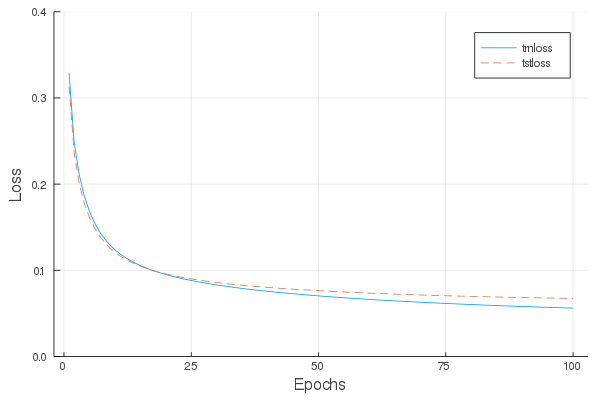

In [0]:
trnloss,tstloss = Array{Float32}(lin[2,:]), Array{Float32}(lin[3,:]) 
plot([trnloss,tstloss],ylim=(.0,.4),labels=[:trnloss :tstloss],xlabel="Epochs",ylabel="Loss")

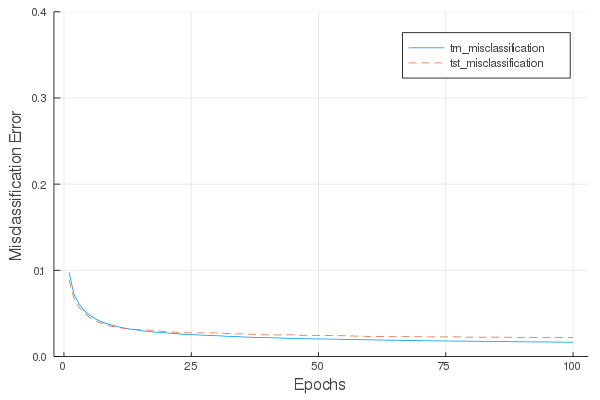

In [0]:
trn_zeroone,tst_zeroone = Array{Float32}(lin[4,:]), Array{Float32}(lin[5,:]) 
plot([trn_zeroone,tst_zeroone],ylim=(.0,.4),labels=[:trn_misclassification :tst_misclassification],xlabel="Epochs",ylabel="Misclassification Error")

# 6

In [0]:
model_adam = Chain(Conv(5,5,1,3),
           DenseLayer(432,10))

Chain((Conv(P(KnetArray{Float32,4}(5,5,1,3)), P(KnetArray{Float32,4}(1,1,3,1)), Knet.sigm, 0), DenseLayer(P(KnetArray{Float32,2}(10,432)), P(KnetArray{Float32,1}(10)))))

In [0]:
function trainresults_adam(file, model)
    # We will train 100 epochs (the following returns an iterator, does not start training)
    training = adam(model, ncycle(dtrn,100))
    # We will snapshot model and train/test loss and errors
    snapshot() = (deepcopy(model),model(dtrn),model(dtst),zeroone(model,dtrn),zeroone(model,dtst))
    # Snapshot results once every epoch (still an iterator)
    snapshots = (snapshot() for x in takenth(progress(training),length(dtrn)))
    # Run the snapshot/training iterator, reshape and save results as a 5x100 array
    lin = reshape(collect(flatten(snapshots)),(5,:))
    # Knet.save and Knet.load can be used to store models in files
    Knet.save(file,"results",lin)
    return lin
end

trainresults_adam (generic function with 1 method)

In [0]:
lin_adam = trainresults_adam("results2.jld2", model_adam);

┣████████████████████┫ [100.00%, 60000/60000, 02:34/02:34, 390.85i/s] 


**Figures/Table**

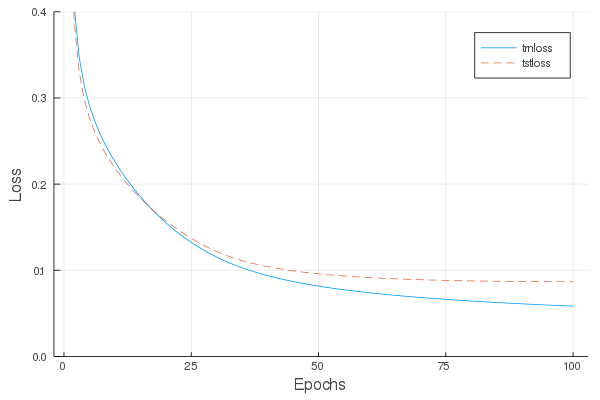

In [0]:
trnloss,tstloss = Array{Float32}(lin_adam[2,:]), Array{Float32}(lin_adam[3,:]) 
plot([trnloss,tstloss],ylim=(.0,.4),labels=[:trnloss :tstloss],xlabel="Epochs",ylabel="Loss")

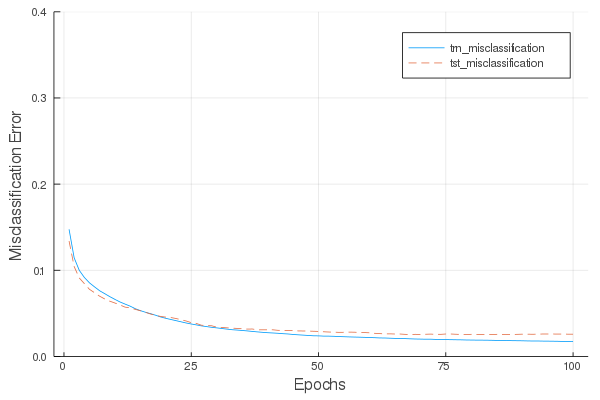

In [0]:
trn_zeroone,tst_zeroone = Array{Float32}(lin_adam[4,:]), Array{Float32}(lin_adam[5,:]) 
plot([trn_zeroone,tst_zeroone],ylim=(.0,.4),labels=[:trn_misclassification :tst_misclassification],xlabel="Epochs",ylabel="Misclassification Error")

# 7

 1. Start with LeNet

In [0]:
LeNet = Chain(Conv(5,5,1,20), Conv(5,5,20,50), DenseLayer(800,500), DenseLayer(500,10))
lenet_adam = trainresults_adam("results3.jld2", LeNet);

┣████████████████████┫ [100.00%, 60000/60000, 04:11/04:11, 239.45i/s] 


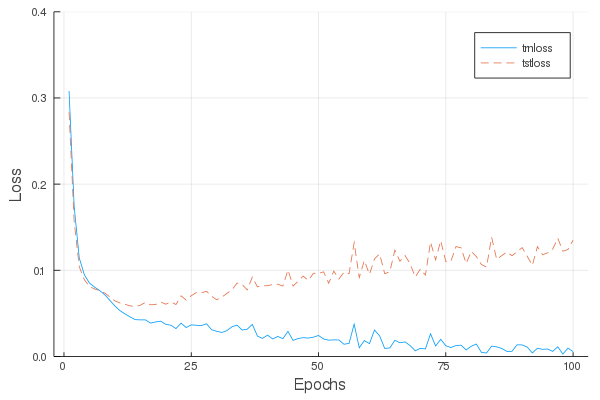

In [0]:
trnloss,tstloss = Array{Float32}(lenet_adam[2,:]), Array{Float32}(lenet_adam[3,:]) 
plot([trnloss,tstloss],ylim=(.0,.4),labels=[:trnloss :tstloss],xlabel="Epochs",ylabel="Loss")

In [0]:
lenet_adam[2,:][end]

0.005552914f0

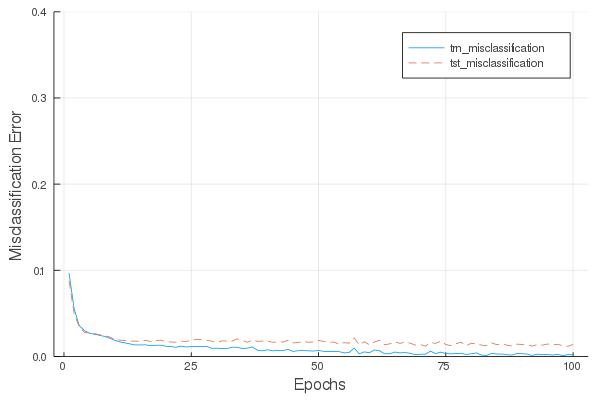

In [0]:
trn_zeroone,tst_zeroone = Array{Float32}(lenet_adam[4,:]), Array{Float32}(lenet_adam[5,:]) 
plot([trn_zeroone,tst_zeroone],ylim=(.0,.4),labels=[:trn_misclassification :tst_misclassification],xlabel="Epochs",ylabel="Misclassification Error")

 2. my_model_1


In [0]:
my_model_1 = Chain(Conv(3,3,1,10),
           DenseLayer(1690,10))

Chain((Conv(P(KnetArray{Float32,4}(3,3,1,10)), P(KnetArray{Float32,4}(1,1,10,1)), Knet.sigm, 0), DenseLayer(P(KnetArray{Float32,2}(10,1690)), P(KnetArray{Float32,1}(10)))))

In [0]:
my_model_1_adam = trainresults_adam("results4.jld2", my_model_1);

┣████████████████████┫ [100.00%, 60000/60000, 02:38/02:38, 378.57i/s] 


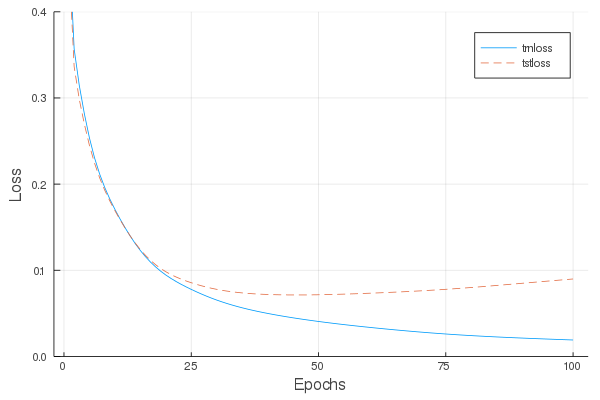

In [0]:
trnloss,tstloss = Array{Float32}(my_model_1_adam[2,:]), Array{Float32}(my_model_1_adam[3,:]) 
plot([trnloss,tstloss],ylim=(.0,.4),labels=[:trnloss :tstloss],xlabel="Epochs",ylabel="Loss")

In [0]:
my_model_1_adam[4,:][end]

0.005333333333333301

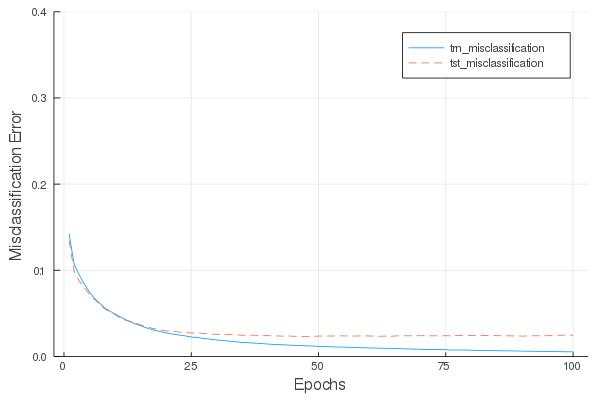

In [0]:
trn_zeroone,tst_zeroone = Array{Float32}(my_model_1_adam[4,:]), Array{Float32}(my_model_1_adam[5,:]) 
plot([trn_zeroone,tst_zeroone],ylim=(.0,.4),labels=[:trn_misclassification :tst_misclassification],xlabel="Epochs",ylabel="Misclassification Error")


3.  my_model_two



In [0]:
my_model_two= Chain(Conv(3,3,1,20),
               Conv(3,3,20,30),
               DenseLayer(750,600),
               DenseLayer(600,300),
               DenseLayer(300,150),
               DenseLayer(150,10));

In [0]:
my_model_two_adam = trainresults_adam("results6.jld2", my_model_two);

┣████████████████████┫ [100.00%, 60000/60000, 04:40/04:40, 214.11i/s] 


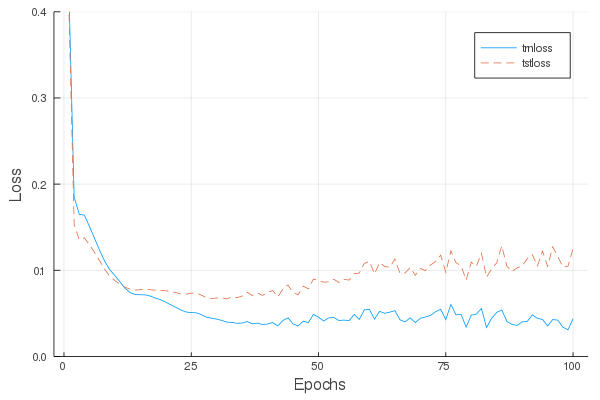

In [0]:
trnloss,tstloss = Array{Float32}(my_model_two_adam[2,:]), Array{Float32}(my_model_two_adam[3,:]) 
plot([trnloss,tstloss],ylim=(.0,.4),labels=[:trnloss :tstloss],xlabel="Epochs",ylabel="Loss")

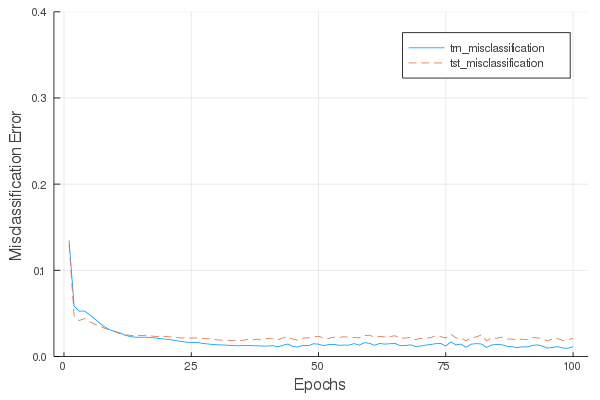

In [0]:
trn_zeroone,tst_zeroone = Array{Float32}(my_model_two_adam[4,:]), Array{Float32}(my_model_two_adam[5,:]) 
plot([trn_zeroone,tst_zeroone],ylim=(.0,.4),labels=[:trn_misclassification :tst_misclassification],xlabel="Epochs",ylabel="Misclassification Error")

In [0]:
function train_with_results(model, epoch, lr)
    training = adam(model, ncycle(dtrn,epoch))
    snapshot() = (deepcopy(model),model(dtrn),model(dtst),zeroone(model,dtrn),zeroone(model,dtst))
    snapshots = (snapshot() for x in takenth(progress(training),length(dtrn)))
    lin = reshape(collect(flatten(snapshots)),(5,:))
    return lin
end

train_with_results (generic function with 2 methods)

In [0]:
my_model_three= Chain(Conv(3,3,1,30),
               Conv(3,3,30,10),
               DenseLayer(250,10));

In [0]:
my_model_three_adam = train_with_results(my_model_three, 300, 0.15);

┣████████████████████┫ [100.00%, 180000/180000, 11:27/11:27, 261.89i/s] 


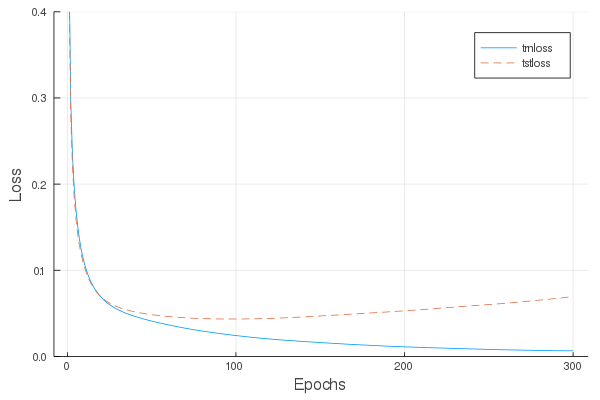

In [0]:
trnloss,tstloss = Array{Float32}(my_model_three_adam[2,:]), Array{Float32}(my_model_three_adam[3,:]) 
plot([trnloss,tstloss],ylim=(.0,.4),labels=[:trnloss :tstloss],xlabel="Epochs",ylabel="Loss")

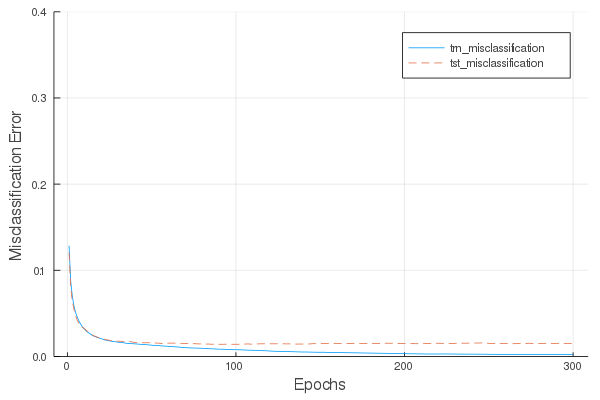

In [0]:
trn_zeroone,tst_zeroone = Array{Float32}(my_model_three_adam[4,:]), Array{Float32}(my_model_three_adam[5,:]) 
plot([trn_zeroone,tst_zeroone],ylim=(.0,.4),labels=[:trn_misclassification :tst_misclassification],xlabel="Epochs",ylabel="Misclassification Error")